In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2
import torchvision
import PIL, PIL.ImageOps, PIL.ImageEnhance, PIL.ImageDraw
from torchvision.transforms import Compose, CenterCrop, ToTensor, Resize
import torch.nn.functional as F
import os
import shutil
from tqdm import tqdm
from imagecorruptions import corrupt
from typing import Optional, Tuple
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from PIL import Image
from utils import load_model, AverageMeter, accuracy
from torch.autograd import Variable

import logging
seed = 11037
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


test_data = unpickle("./cifar-10-batches-py/test_batch")
data_batch_1 = unpickle("./cifar-10-batches-py/data_batch_1")
data_batch_2 = unpickle("./cifar-10-batches-py/data_batch_2")
data_batch_3 = unpickle("./cifar-10-batches-py/data_batch_3")
data_batch_4 = unpickle("./cifar-10-batches-py/data_batch_4")
data_batch_5 = unpickle("./cifar-10-batches-py/data_batch_5")

def get_data(input_data):
    data=[]
    label=[]
    for keys,values in input_data.items():    
        if keys == b'data':
            data = values

        if keys == b'labels':
            label = values

    return data,label
        
        
def imwrite_images(image):#
    image=image.reshape(-1,1024)
    #print(image.shape)
    r=image[0,:].reshape(32,32)#红色分量
    g=image[1,:].reshape(32,32)#绿色分量
    b=image[2,:].reshape(32,32)#蓝色分量
    img=np.zeros((32,32,3))
    #RGB还原成彩色图像
    img[:,:,0]=r
    img[:,:,1]=g
    img[:,:,2]=b

    return img

In [4]:
data1,label1 = get_data(data_batch_1) 
data2,label2 = get_data(data_batch_2) 
data3,label3 = get_data(data_batch_3) 
data4,label4 = get_data(data_batch_4) 
data5,label5 = get_data(data_batch_5)
test_data,test_label = get_data(test_data)

In [5]:
all_data = np.zeros((50000,32,32,3))
all_label = np.zeros((50000,10))

In [6]:
for i in range(10000):
    pic = imwrite_images(data1[i])
    all_data[i,:,:,:] = pic
    all_label[i,label1[i]] = 1

In [7]:
for i in range(10000):
    j =i+10000
    pic = imwrite_images(data2[i])
    all_data[j,:,:,:] = pic
    all_label[j,label2[i]] = 1

In [8]:
for i in range(10000):
    j =i+20000
    pic = imwrite_images(data3[i])
    all_data[j,:,:,:] = pic
    all_label[j,label3[i]] = 1

In [9]:
for i in range(10000):
    j =i+30000
    pic = imwrite_images(data4[i])
    all_data[j,:,:,:] = pic
    all_label[j,label4[i]] = 1

In [10]:
for i in range(10000):
    j =i+40000
    pic = imwrite_images(data5[i])
    all_data[j,:,:,:] = pic
    all_label[j,label5[i]] = 1

In [11]:
label_index = np.argmax(all_label,1)

In [12]:
print(sum(label_index == 0))
print(sum(label_index == 1))
print(sum(label_index == 2))
print(sum(label_index == 3))
print(sum(label_index == 4))
print(sum(label_index == 5))
print(sum(label_index == 6))
print(sum(label_index == 7))
print(sum(label_index == 8))
print(sum(label_index == 9))

5000
5000
5000
5000
5000
5000
5000
5000
5000
5000


In [13]:
all_data = all_data.astype('uint8')

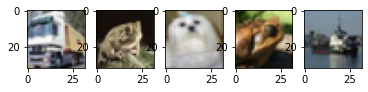

In [14]:
index = 1
plt.subplot(151)
plt.imshow(all_data[index])
plt.subplot(152)
plt.imshow(all_data[10000+index])
plt.subplot(153)
plt.imshow(all_data[20000+index])
plt.subplot(154)
plt.imshow(all_data[30000+index])
plt.subplot(155)
plt.imshow(all_data[40000+index])
plt.show()

In [15]:
all_data.shape

(50000, 32, 32, 3)

In [16]:
label_list=[[],[],[],[],[],[],[],[],[],[]]

In [17]:
for i in range(len(list(label_index))):
    label = list(label_index)[i]
    label_list[label].append(i)  #开始分类，准备开始套娃

In [18]:
label_list[0]

[29,
 30,
 35,
 49,
 77,
 93,
 115,
 116,
 129,
 165,
 179,
 185,
 189,
 199,
 213,
 220,
 223,
 233,
 264,
 276,
 279,
 284,
 293,
 308,
 317,
 332,
 341,
 344,
 348,
 349,
 352,
 371,
 373,
 376,
 392,
 401,
 404,
 405,
 407,
 415,
 417,
 436,
 439,
 448,
 453,
 455,
 457,
 467,
 468,
 481,
 497,
 504,
 527,
 555,
 557,
 564,
 598,
 600,
 604,
 605,
 608,
 614,
 626,
 628,
 637,
 650,
 658,
 663,
 687,
 694,
 695,
 698,
 700,
 708,
 713,
 731,
 733,
 735,
 748,
 752,
 757,
 765,
 782,
 783,
 799,
 812,
 822,
 843,
 866,
 871,
 872,
 902,
 905,
 906,
 911,
 927,
 938,
 940,
 965,
 974,
 983,
 989,
 1012,
 1039,
 1044,
 1086,
 1097,
 1119,
 1123,
 1130,
 1142,
 1144,
 1147,
 1166,
 1168,
 1178,
 1185,
 1187,
 1188,
 1195,
 1205,
 1211,
 1214,
 1216,
 1227,
 1234,
 1243,
 1249,
 1260,
 1266,
 1270,
 1278,
 1296,
 1306,
 1319,
 1329,
 1335,
 1338,
 1340,
 1376,
 1381,
 1382,
 1400,
 1424,
 1428,
 1432,
 1434,
 1454,
 1463,
 1466,
 1470,
 1473,
 1477,
 1481,
 1493,
 1507,
 1514,
 1522,
 1

In [19]:
all_label = all_label*0.9 + 0.01

In [20]:
all_label.shape

(50000, 10)

In [21]:
all_label

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.91],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.91],
       ...,
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.91],
       [0.01, 0.91, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.91, 0.01, ..., 0.01, 0.01, 0.01]])

In [22]:
save_data = np.zeros([10000,32,32,3])
save_label = np.zeros([10000,10])

In [23]:
all_corr_data = np.load('all_corr_data.npy')  #load data

In [26]:
index = 0 
noise_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]  
for i in range(10):
    for j in range(1000):
        now_list = random.sample(noise_list, 1) 
        tar = label_list[i][j]
        save_data[index] = all_corr_data[50000*now_list[0] + tar]
        save_label[index] = all_label[tar]
        index +=1

save_data = save_data.astype('uint8')

IndexError: index 10050 is out of bounds for axis 0 with size 10000

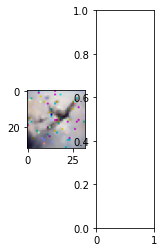

In [27]:
index = 50
plt.subplot(151)
plt.imshow(save_data[index])
plt.subplot(152)
plt.imshow(save_data[10000+index])
plt.subplot(153)
plt.imshow(save_data[20000+index])
plt.subplot(154)
plt.imshow(save_data[30000+index])
plt.subplot(155)
plt.imshow(save_data[40000+index])
plt.show()

In [28]:
save_label.shape

(10000, 10)

In [29]:
np.save("./data.npy", save_data)
np.save("./label.npy", save_label)

In [30]:
np.save("./new_data/data1.npy", save_data)
np.save("./new_data/label1.npy", save_label)

In [ ]:
#### ------- ####

In [4]:
# Start to cycle

In [5]:
num = 1 #Use the previous model to filter the data, 1, 2, 3, 4

In [6]:
last_data  = np.load(f"./new_data/data{num}.npy")
last_label = np.load(f"./new_data/label{num}.npy")

In [7]:
save_data = np.zeros([(num+1)*10000,32,32,3])
save_label = np.zeros([(num+1)*10000,10])

In [8]:
save_data[:num*10000] = last_data
save_label[:num*10000] = last_label

In [9]:
save_data = save_data.astype('uint8')

IndexError: index 20050 is out of bounds for axis 0 with size 20000

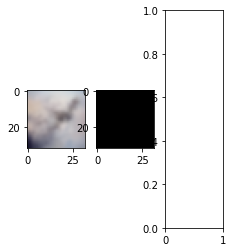

In [10]:
index = 50
plt.subplot(151)
plt.imshow(save_data[index])
plt.subplot(152)
plt.imshow(save_data[10000+index])
plt.subplot(153)
plt.imshow(save_data[20000+index])
plt.subplot(154)
plt.imshow(save_data[30000+index])
plt.subplot(155)
plt.imshow(save_data[40000+index])
plt.show()

In [11]:
def load_premodel():

    pretrained_model1 = load_model('wideresnet')
    checkpoint1 = torch.load(f'./train_model/wideresnet_{num}.pth.tar')
    pretrained_model1.load_state_dict(checkpoint1['state_dict'])
    
    pretrained_model2 = load_model('preactresnet18')
    checkpoint2 = torch.load(f'./train_model/preactresnet18_{num}.pth.tar')
    pretrained_model2.load_state_dict(checkpoint2['state_dict'])

    model1 = nn.Sequential(
            pretrained_model1
        )
    
    model2 = nn.Sequential(
            pretrained_model2
        )

    return model1, model2

model1, model2 = load_premodel()
model1.cuda()
model1.eval()
model2.cuda()
model2.eval()

Sequential(
  (0): PreActResNet(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (layer1): Sequential(
      (0): PreActBlock(
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (1): PreActBlock(
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
    )
    (layer2): Sequent

In [12]:
all_corr_data.shape

NameError: name 'all_corr_data' is not defined

In [137]:
tar_photo = np.zeros([150000,32,32,3])
index = 0 
for i in range(10):
    for j in range(1000):
        tar = label_list[i][num*1000+j]
        #save_data[num*10000+index] = all_data[tar]
        save_label[num*10000+index] = all_label[tar]
        
        for k in range(15):
            tar_photo[k*10000+index] = all_corr_data[k*50000+tar]
            
        index +=1

tar_photo = tar_photo.astype('uint8')

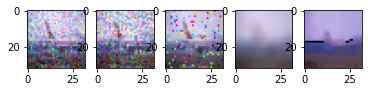

In [138]:
index = 50
plt.subplot(151)
plt.imshow(tar_photo[index])
plt.subplot(152)
plt.imshow(tar_photo[10000+index])
plt.subplot(153)
plt.imshow(tar_photo[20000+index])
plt.subplot(154)
plt.imshow(tar_photo[30000+index])
plt.subplot(155)
plt.imshow(tar_photo[150000+index])
plt.show()

In [139]:
save_data_jilu = np.zeros((150000,1))
save_data1 = np.zeros((150000,1))
save_data2= np.zeros((150000,1))
index_1 = 0
vail1 = []
class MyvailDataset(torch.utils.data.Dataset):
    def __init__(self, transform,input_image,input_label):

        self.images = input_image
        self.labels = input_label
        assert self.labels.min() >= 0
        assert self.images.dtype == np.uint8
        assert self.images.shape[0] <= 500000
        assert self.images.shape[1:] == (32, 32, 3)
        self.raw_images = self.images
        self.images = [Image.fromarray(x) for x in self.images]
        self.labels = self.labels / self.labels.sum(axis=1, keepdims=True) # normalize
        self.labels = self.labels.astype(np.float32)
        self.transform = transform
        print(len(self.images))
    def __getitem__(self, index):
        image, label = self.images[index], self.labels[index]
        raw_image = self.raw_images[index]
        image = self.transform(image)
        
        return image, label, raw_image
    def __len__(self):
        return len(self.labels)
    
for model_n in range(15):
    print("第{}个模型".format(model_n))
    transform_vail = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
            ])
    #vailset = MyvailDataset(transform=transform_vail,input_image = data_list[model_n],input_label=label_list[model_n])
    
    vailset = MyvailDataset(transform=transform_vail,input_image = tar_photo[model_n*10000:(model_n+1)*10000],input_label=save_label[num*10000:(num+1)*10000])
    batch_size = 200
    vailloader = data.DataLoader(vailset, batch_size=batch_size, shuffle=False, num_workers=4)

    start = model_n*10000 - batch_size
    vail_loss = 0
    vail_acc = 0
    losses = AverageMeter()
    accs = AverageMeter()
    def cross_entropy(outputs, smooth_labels):
        loss = torch.nn.KLDivLoss(reduction='batchmean')
        return loss(F.log_softmax(outputs, dim=1), smooth_labels)


    for (inputs, soft_labels,raw_image) in vailloader:
        start += batch_size
        inputs, soft_labels = inputs.cuda(), soft_labels.cuda()
        outputs = model1(inputs)
        vail_targets = soft_labels.argmax(dim=1)
        true_label = vail_targets.cpu().numpy()
        predict = outputs.argmax(dim=1).cpu().numpy()
    
        #print(raw_image)
        vail_loss = cross_entropy(outputs, soft_labels)
        vail_acc = accuracy(outputs, vail_targets)

        for i in range(len(true_label)):
            if true_label[i] != predict[i]:
                save_data_jilu[start+i] += 1
                index_1 +=1
                save_data1[start+i] +=1

        #print(outputs)
        #print(vail_targets)
        #break
        losses.update(vail_loss.item(), inputs.size(0))
        accs.update(vail_acc[0].item(), inputs.size(0))
        #print(accs.avg)
    vail_loss = losses.avg
    vail_acc = accs.avg
    
    vail1.append(vail_acc)
    print(vail_acc)
    
    

第0个模型
10000
79.93
第1个模型
10000
79.41
第2个模型
10000
80.94
第3个模型
10000
73.99
第4个模型
10000
76.89
第5个模型
10000
76.15
第6个模型
10000
84.75
第7个模型
10000
79.2
第8个模型
10000
80.41
第9个模型
10000
80.68
第10个模型
10000
85.27
第11个模型
10000
84.75
第12个模型
10000
73.43
第13个模型
10000
83.22
第14个模型
10000
76.28
第15个模型
10000
74.27


In [140]:
index_2 = 0
vail2 = []
class MyvailDataset(torch.utils.data.Dataset):
    def __init__(self, transform,input_image,input_label):

        self.images = input_image
        self.labels = input_label
        assert self.labels.min() >= 0
        assert self.images.dtype == np.uint8
        assert self.images.shape[0] <= 500000
        assert self.images.shape[1:] == (32, 32, 3)
        self.raw_images = self.images
        self.images = [Image.fromarray(x) for x in self.images]
        self.labels = self.labels / self.labels.sum(axis=1, keepdims=True) # normalize
        self.labels = self.labels.astype(np.float32)
        self.transform = transform
        print(len(self.images))
    def __getitem__(self, index):
        image, label = self.images[index], self.labels[index]
        raw_image = self.raw_images[index]
        image = self.transform(image)
        
        return image, label, raw_image
    def __len__(self):
        return len(self.labels)
    
for model_n in range(15):
    print("第{}个模型".format(model_n))
    transform_vail = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
            ])
    #vailset = MyvailDataset(transform=transform_vail,input_image = data_list[model_n],input_label=label_list[model_n])
    
    vailset = MyvailDataset(transform=transform_vail,input_image = tar_photo[model_n*10000:(model_n+1)*10000],input_label=save_label[num*10000:(num+1)*10000])
    batch_size = 200
    vailloader = data.DataLoader(vailset, batch_size=batch_size, shuffle=False, num_workers=4)

    start = model_n*10000 - batch_size
    vail_loss = 0
    vail_acc = 0
    losses = AverageMeter()
    accs = AverageMeter()
    def cross_entropy(outputs, smooth_labels):
        loss = torch.nn.KLDivLoss(reduction='batchmean')
        return loss(F.log_softmax(outputs, dim=1), smooth_labels)


    for (inputs, soft_labels,raw_image) in vailloader:
        start += batch_size
        inputs, soft_labels = inputs.cuda(), soft_labels.cuda()
        outputs = model2(inputs)
        vail_targets = soft_labels.argmax(dim=1)
        true_label = vail_targets.cpu().numpy()
        predict = outputs.argmax(dim=1).cpu().numpy()
    
        #print(raw_image)
        vail_loss = cross_entropy(outputs, soft_labels)
        vail_acc = accuracy(outputs, vail_targets)

        for i in range(len(true_label)):
            if true_label[i] != predict[i]:
                save_data_jilu[start+i] += 1
                index_2 +=1
                save_data2[start+i] +=1

        #print(outputs)
        #print(vail_targets)
        #break
        losses.update(vail_loss.item(), inputs.size(0))
        accs.update(vail_acc[0].item(), inputs.size(0))
        #print(accs.avg)
    vail_loss = losses.avg
    vail_acc = accs.avg
    
    vail2.append(vail_acc)
    print(vail_acc)
    
    

第0个模型
10000
80.84
第1个模型
10000
80.41
第2个模型
10000
82.55
第3个模型
10000
75.41
第4个模型
10000
78.0
第5个模型
10000
78.3
第6个模型
10000
86.04
第7个模型
10000
80.56
第8个模型
10000
81.56
第9个模型
10000
82.4
第10个模型
10000
86.21
第11个模型
10000
85.15
第12个模型
10000
74.97
第13个模型
10000
84.2
第14个模型
10000
76.17
第15个模型
10000
74.57


In [141]:
print(index_1)
print(index_2)

33043
31266


In [161]:
#fourth model

33043
31266

23238
21381


In [140]:
#third model

38139
35855

27034
24733


In [120]:
#second model

48021
44781

32142
28325


In [78]:
#first model

82567
78159

78159

In [142]:
np.mean(vail1)

79.34812500000001

In [143]:
np.mean(vail2)

80.45875000000001

In [144]:
a=0
b=0
c=0
d=0
for i in range(10000):
    jilu_all = [] #同时分类失败
    jilu1 = [] #wide分类失败
    jilu2 = [] #pre分类失败
    
    for j in range(15):
        if save_data_jilu[j*10000+i] ==2:
            jilu_all.append(j)
            
        elif save_data1[j*10000+i] ==1:
            jilu1.append(j)
            
        elif save_data2[j*10000+i] ==1:
            jilu2.append(j)
            
    
    if jilu_all:
        a+=1
        now_list = random.sample(jilu_all, 1) 
    elif jilu1:
        b+=1
        now_list = random.sample(jilu1, 1) 
    elif jilu2:
        c+=1
        now_list = random.sample(jilu2, 1) 
    else:
        d+=1
        noise_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
        now_list = random.sample(noise_list, 1)
        
    save_data[num*10000+i] = tar_photo[now_list[0]*10000+i]
    

In [145]:
print(a)
print(b)
print(c)
print(d)

4100
1560
788
3552


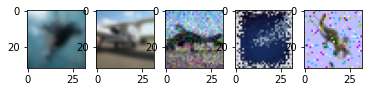

In [146]:
index = 450
plt.subplot(151)
plt.imshow(save_data[index])
plt.subplot(152)
plt.imshow(save_data[10000+index])
plt.subplot(153)
plt.imshow(save_data[20000+index])
plt.subplot(154)
plt.imshow(save_data[30000+index])
plt.subplot(155)
plt.imshow(save_data[40000+index])
plt.show()

In [147]:
np.save("./data.npy", save_data)
np.save("./label.npy", save_label)

In [148]:
np.save(f"./new_data/data{num+1}.npy", save_data)
np.save(f"./new_data/label{num+1}.npy", save_label)